<center><img src="redpopcorn.jpg"></center>

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry.

You work for a production company that specializes in nostalgic styles. You want to do some research on movies released in the 1990's. You'll delve into Netflix data and perform exploratory data analysis to better understand this awesome movie decade!

You have been supplied with the dataset `netflix_data.csv`, along with the following table detailing the column names and descriptions. Feel free to experiment further after submitting!

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

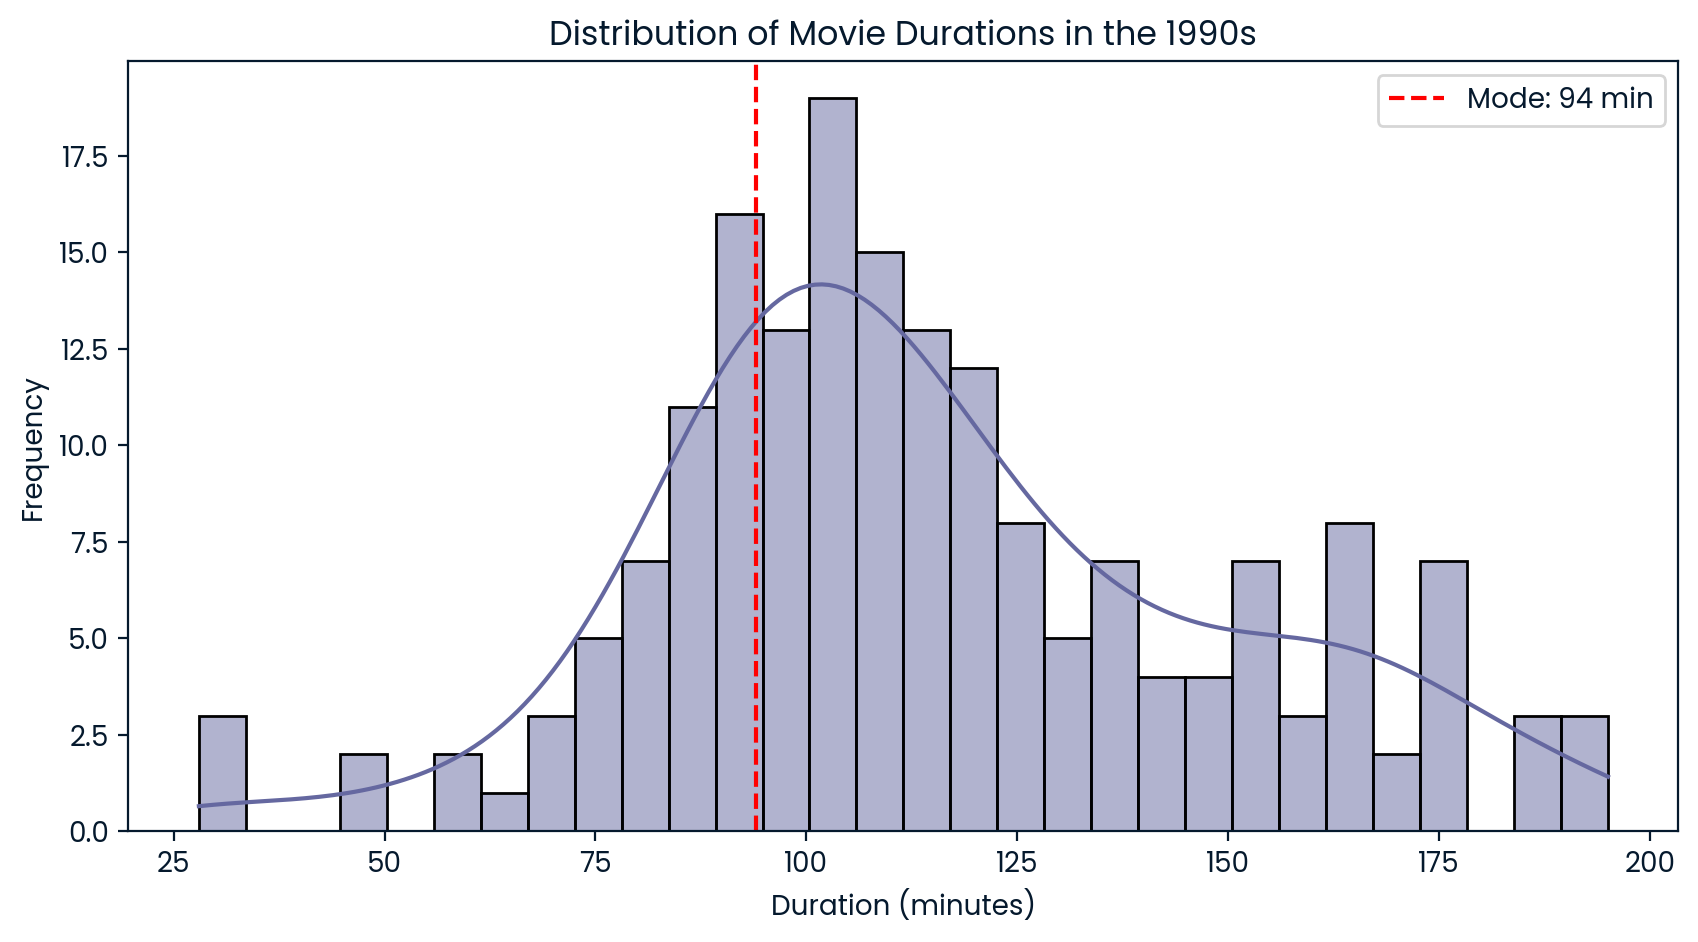

(94, 0)

In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

netflix_df = pd.read_csv("netflix_data.csv")

netflix_df.head()

netflix_movies = netflix_df[netflix_df['type'] == 'Movie']

netflix_movies['duration'] = netflix_movies['duration'].astype(str)

# Convert duration to numeric
netflix_movies['duration'] = netflix_movies['duration'].str.replace(" min", "", regex=True).astype(int)

# Filter movies released in the 1990s (1990 to 1999)
movies_90s = netflix_movies[(netflix_movies['release_year'] >= 1990) & (netflix_movies['release_year'] < 2000)]

# Find the most frequent movie duration in the 1990s
duration = movies_90s['duration'].mode()[0]

# Identify short action movies (duration < 90 minutes and genre includes "Action")
if 'listed_in' in movies_90s.columns:
    short_movie_count = movies_90s[(movies_90s['duration'] < 90) & (movies_90s['listed_in'].str.contains("Action", na=False))].shape[0]
else:
    short_movie_count = 0

# Visualizing movie durations in the 1990s
plt.figure(figsize=(10, 5))
sns.histplot(movies_90s['duration'], bins=30, kde=True)
plt.axvline(duration, color='red', linestyle='dashed', label=f'Mode: {duration} min')
plt.title('Distribution of Movie Durations in the 1990s')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Display results
duration, short_movie_count


  

In [3]:
# Which genres are most prevalent?

genres_series = netflix_df['genre'].dropna().str.split(', ')
all_genres = [genre for sublist in genres_series for genre in sublist]
genre_counts = pd.Series(all_genres).value_counts()

print("Most common genre:", genre_counts.idxmax())
print("With count:", genre_counts.max())

# Show top 10 genres
print("\nTop 10 genres:")
print(genre_counts.head(10))


Most common genre: Dramas
With count: 1343

Top 10 genres:
Dramas                  1343
Comedies                1029
Action                   696
Children                 421
Documentaries            352
Stand-Up                 283
Horror Movies            239
International Movies     100
Classic Movies            69
Thrillers                 49
dtype: int64


In [5]:
# How do TV shows compare with movies in terms of count?

types_series = netflix_df['type'].dropna().str.split(', ')
all_types = [type for sublist in types_series for type in sublist]
type_counts = pd.Series(all_types).value_counts()

print("Num of Movies vs TV shows on Netflix :")
print(type_counts.head())


Num of Movies vs TV shows on Netflix :
Movie      4677
TV Show     135
dtype: int64


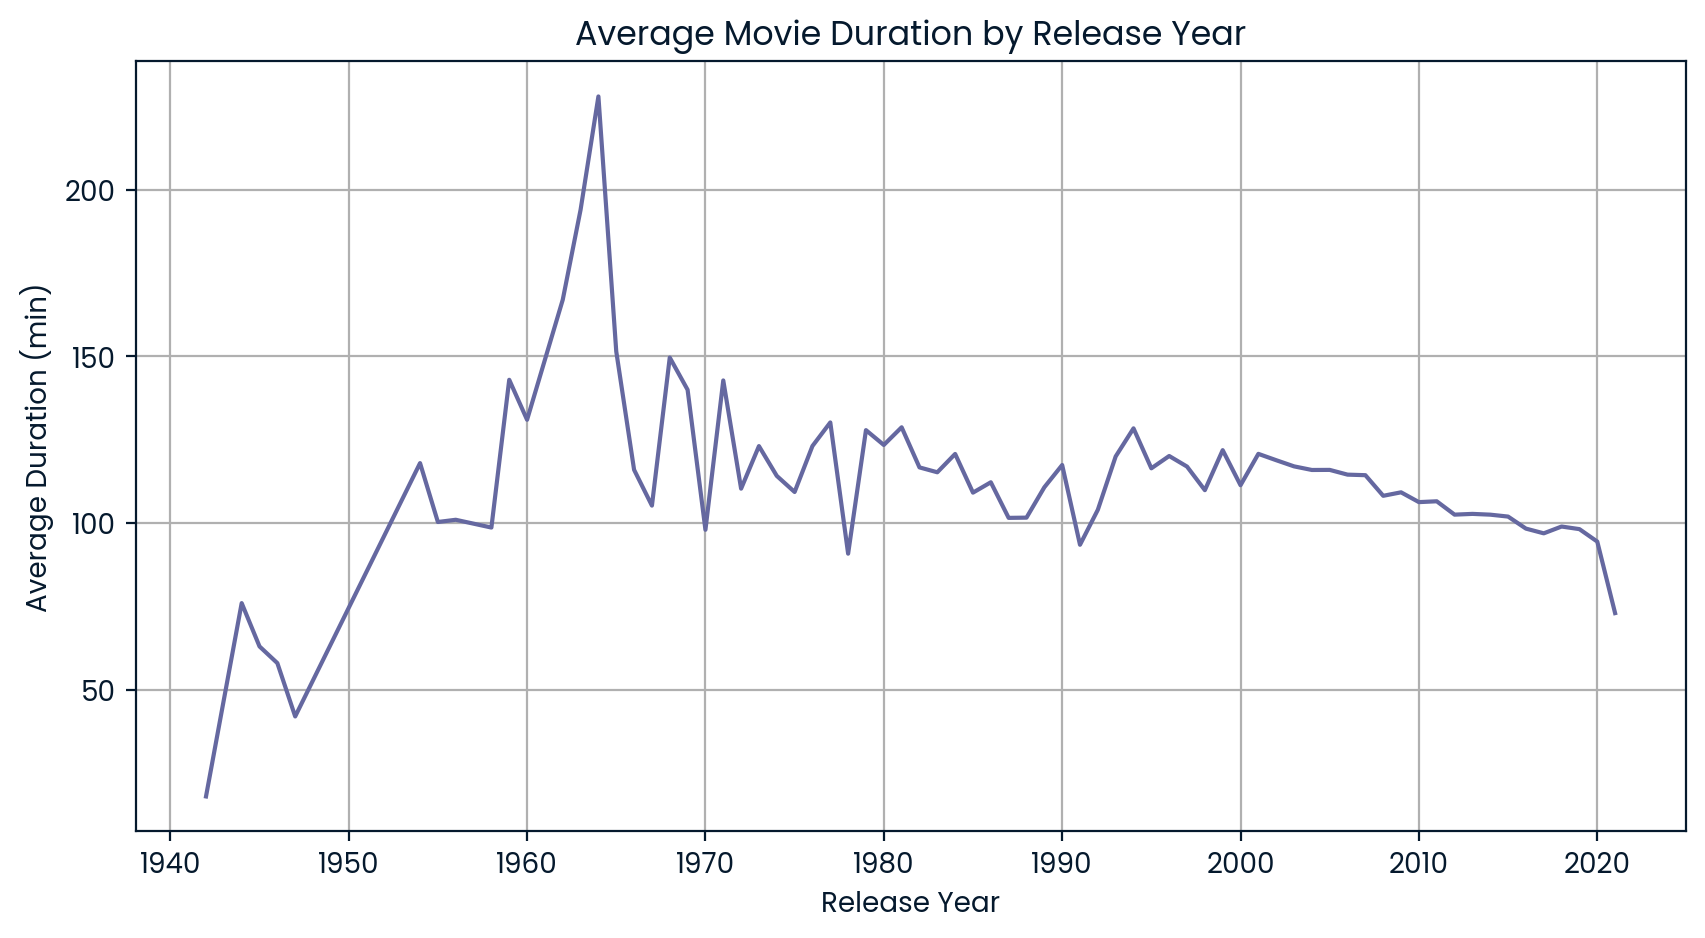

In [6]:
# Are there trends in the length of Netflix movies over the years?

avg_duration_by_year = netflix_movies.groupby('release_year')['duration'].mean()

# Plot it
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
avg_duration_by_year.plot(kind='line')
plt.title('Average Movie Duration by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average Duration (min)')
plt.grid(True)
plt.show()